<a href="https://colab.research.google.com/github/BetikuOluwatobi/Daily-Tempearature-Forecast-Using-Recurrent-Neural-Networks/blob/main/Daily_Temperature_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

## Mounting Drive

In [ ]:
data_names = os.listdir('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/raw-data')

## Helper Function built from loading the data from drive storage after the drive has been mounted on google colab

In [ ]:
import csv
path = '/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/raw-data/'
def load_datas(dir=path,data_names = data_names):
  for i, name in enumerate(data_names):
    if i > 0:
      the_file = open(path+name, 'r')
      reader = csv.reader(the_file)
      data = []
      for i, row in enumerate(reader):
          if i >= 15:
            data.append(row)
      df_new = pd.DataFrame(data[1:],columns=data[0])
      df = pd.concat([df,df_new],axis=0,ignore_index=True)
    else:
      the_file = open(path+name, 'r')
      reader = csv.reader(the_file)
      data = []
      for i, row in enumerate(reader):
          if i >= 15:
            data.append(row)
      df = pd.DataFrame(data[1:],columns=data[0])
    df = df
  return df


In [ ]:
df = load_datas()

In [ ]:
df

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2016-06-01 00:00,2016,06,01,00:00,12.0,,5.2,,63,,1,,14,,,,100.87,,,,,,NA
1,2016-06-01 01:00,2016,06,01,01:00,11.5,,5.4,,66,,1,,13,,,,100.88,,,,,,NA
2,2016-06-01 02:00,2016,06,01,02:00,10.6,,5.7,,72,,1,,11,,,,100.88,,,,,,NA
3,2016-06-01 03:00,2016,06,01,03:00,10.2,,6.1,,76,,36,,12,,,,100.86,,,,,,NA
4,2016-06-01 04:00,2016,06,01,04:00,8.3,,5.8,,84,,36,,10,,,,100.92,,,,,,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40908,2017-09-30 19:00,2017,09,30,19:00,9.3,,4.0,,70,,2,,1,,,,101.73,,,,,,NA
40909,2017-09-30 20:00,2017,09,30,20:00,7.7,,5.7,,87,,35,,5,,,,101.77,,,,,,NA
40910,2017-09-30 21:00,2017,09,30,21:00,6.4,,5.4,,93,,34,,4,,,,101.77,,,,,,NA
40911,2017-09-30 22:00,2017,09,30,22:00,4.2,,3.4,,95,,34,,10,,,,101.78,,,,,,NA


## Converting the date/time column to python datatime data type

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

### Sorting rows by the Date/Time column

In [ ]:
df = df.sort_values(by='Date/Time',ignore_index=True)

In [ ]:
pd.concat([df['Date/Time'],pd.Series(df['Temp (°C)'].values,name='Temp')],axis=1)

,Date/Time,Temp
0,2015-01-01 00:00:00,-5.9
1,2015-01-01 01:00:00,-5.9
2,2015-01-01 02:00:00,-6.1
3,2015-01-01 03:00:00,-5.8
4,2015-01-01 04:00:00,-5.7
...,...,...
40908,NaT,NaN
40909,NaT,NaN
40910,NaT,NaN
40911,NaT,NaN


In [ ]:
df

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2015-01-01 00:00:00,2015,01,01,00:00,-5.9,,-11.8,,63,,26,,28,,,,100.21,,,,-14,,NA
1,2015-01-01 01:00:00,2015,01,01,01:00,-5.9,,-13.6,,54,,26,,21,,,,100.19,,,,-13,,NA
2,2015-01-01 02:00:00,2015,01,01,02:00,-6.1,,-14.2,,53,,26,,27,,,,100.17,,,,-14,,NA
3,2015-01-01 03:00:00,2015,01,01,03:00,-5.8,,-13.2,,56,,25,,28,,,,100.14,,,,-14,,NA
4,2015-01-01 04:00:00,2015,01,01,04:00,-5.7,,-11.9,,62,,25,,24,,,,100.14,,,,-13,,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40908,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40909,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40910,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40911,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
40908,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40909,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40910,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40911,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40912,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping NA rows

## All rows after 2018 are NAs

In [ ]:
df = df.dropna(axis=0)

## Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28021 entries, 0 to 28463
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date/Time            28021 non-null  datetime64[ns]
 1   Year                 28021 non-null  object        
 2   Month                28021 non-null  object        
 3   Day                  28021 non-null  object        
 4   Time                 28021 non-null  object        
 5   Temp (°C)            28021 non-null  object        
 6   Temp Flag            28021 non-null  object        
 7   Dew Point Temp (°C)  28021 non-null  object        
 8   Dew Point Temp Flag  28021 non-null  object        
 9   Rel Hum (%)          28021 non-null  object        
 10  Rel Hum Flag         28021 non-null  object        
 11  Wind Dir (10s deg)   28021 non-null  object        
 12  Wind Dir Flag        28021 non-null  object        
 13  Wind Spd (km/h)      28021 non-

## All values in weather column are NA

In [ ]:
sum(df.Weather == 'NA')

28021

## Weather Column dropped no info given

In [ ]:
df = df.drop('Weather',axis=1)

## Columns with Missing Data

In [ ]:
columns = ['Temp Flag','Dew Point Temp Flag','Rel Hum Flag','Wind Dir Flag','Wind Spd Flag','Visibility (km)','Visibility Flag','Stn Press Flag','Hmdx','Hmdx Flag','Wind Chill Flag']

### Missing Values Check

In [ ]:
(df[columns] == '').sum() #As is show most of this columns data are missing

Temp Flag              28011
Dew Point Temp Flag    28021
Rel Hum Flag           28021
Wind Dir Flag          28021
Wind Spd Flag          28021
Visibility (km)        28021
Visibility Flag        28021
Stn Press Flag         28021
Hmdx                   24454
Hmdx Flag              28021
Wind Chill Flag        28021
dtype: int64

## Dropping the columns with over 80 percent missing data values

In [ ]:
(df[columns] == '').sum()/28011 * 100 #Over 80% data are missing for all so i will be dropping all columns

Temp Flag              100.000000
Dew Point Temp Flag    100.035700
Rel Hum Flag           100.035700
Wind Dir Flag          100.035700
Wind Spd Flag          100.035700
Visibility (km)        100.035700
Visibility Flag        100.035700
Stn Press Flag         100.035700
Hmdx                    87.301417
Hmdx Flag              100.035700
Wind Chill Flag        100.035700
dtype: float64

In [ ]:
df = df.drop(columns=columns,axis=1)

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

## Boolean Check of Data with Missing Values

In [ ]:
df.isna().any()

Date/Time              False
Year                   False
Month                  False
Day                    False
Time                   False
Temp (°C)               True
Dew Point Temp (°C)     True
Rel Hum (%)            False
Wind Dir (10s deg)      True
Wind Spd (km/h)        False
Stn Press (kPa)         True
Wind Chill              True
dtype: bool

## Percentage of Missing Values by column after dropping the first batch of missing data

In [ ]:
df.isna().sum()/28011 * 100 #72 percent of Wind Chill Data is missing thats too large so i will be dropping the column

Date/Time               0.000000
Year                    0.000000
Month                   0.000000
Day                     0.000000
Time                    0.000000
Temp (°C)               0.035700
Dew Point Temp (°C)     0.003570
Rel Hum (%)             0.000000
Wind Dir (10s deg)      0.528364
Wind Spd (km/h)         0.000000
Stn Press (kPa)         0.003570
Wind Chill             72.953483
dtype: float64

## Dropping Missing Columns

In [ ]:
df = df.drop(['Wind Dir (10s deg)','Wind Chill'],axis=1)

# Exploratory Data Analysis and Data Types Adjustment

In [ ]:
df_cols = ['Year','Month','Day','Temp (°C)','Dew Point Temp (°C)','Rel Hum (%)','Wind Spd (km/h)','Stn Press (kPa)']

In [ ]:
df[df_cols] = df[df_cols].apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28021 entries, 0 to 28463
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date/Time            28021 non-null  datetime64[ns]
 1   Year                 28021 non-null  int64         
 2   Month                28021 non-null  int64         
 3   Day                  28021 non-null  int64         
 4   Time                 28021 non-null  object        
 5   Temp (°C)            28011 non-null  float64       
 6   Dew Point Temp (°C)  28020 non-null  float64       
 7   Rel Hum (%)          28021 non-null  int64         
 8   Wind Spd (km/h)      28021 non-null  int64         
 9   Stn Press (kPa)      28020 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 2.4+ MB


In [ ]:
# pd.get_dummies(pd.to_datetime(df['Time'],unit='ns'))

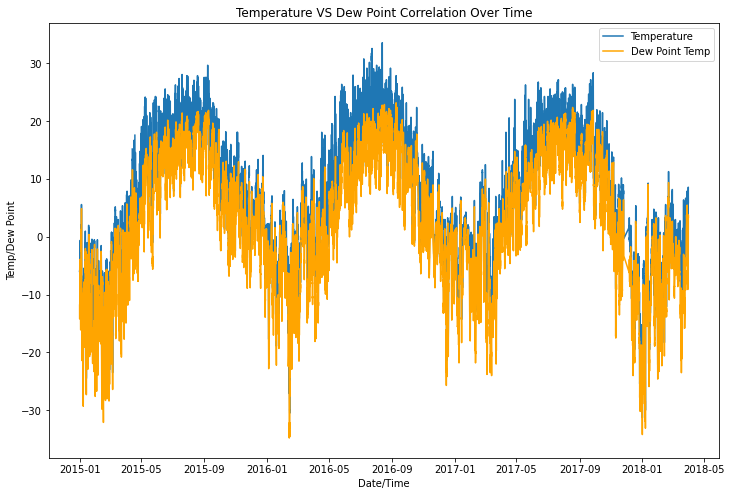

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df['Date/Time'],df['Temp (°C)'],label='Temperature')
ax.plot(df['Date/Time'],df['Dew Point Temp (°C)'],color='orange',label='Dew Point Temp')
ax.set_title('Temperature VS Dew Point Correlation Over Time')
ax.set_xlabel('Date/Time')
ax.set_ylabel('Temp/Dew Point')
ax.legend()

In [ ]:
df = df.set_index('Date/Time')

In [ ]:
one_day = df['Temp (°C)'].iloc[0:24]

In [ ]:
one_day

Date/Time
2015-01-01 00:00:00   -5.9
2015-01-01 01:00:00   -5.9
2015-01-01 02:00:00   -6.1
2015-01-01 03:00:00   -5.8
2015-01-01 04:00:00   -5.7
2015-01-01 05:00:00   -5.3
2015-01-01 06:00:00   -4.2
2015-01-01 07:00:00   -3.8
2015-01-01 08:00:00   -3.7
2015-01-01 09:00:00   -3.2
2015-01-01 10:00:00   -2.8
2015-01-01 11:00:00   -3.5
2015-01-01 12:00:00   -3.5
2015-01-01 13:00:00   -3.4
2015-01-01 14:00:00   -3.3
2015-01-01 15:00:00   -2.7
2015-01-01 16:00:00   -2.6
2015-01-01 17:00:00   -2.7
2015-01-01 18:00:00   -2.3
2015-01-01 19:00:00   -2.4
2015-01-01 20:00:00   -1.8
2015-01-01 21:00:00   -1.3
2015-01-01 22:00:00   -0.9
2015-01-01 23:00:00   -0.9
Name: Temp (°C), dtype: float64

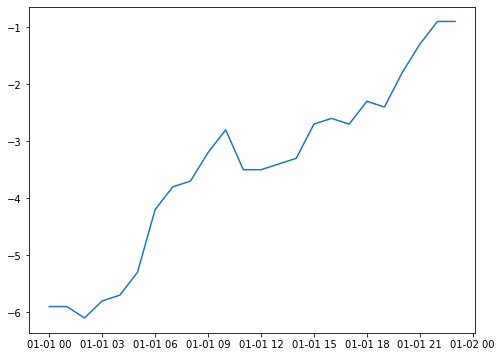

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(one_day)

In [ ]:
test = df['Temp (°C)'].rolling(24).mean()

In [ ]:
test.dropna(inplace=True)

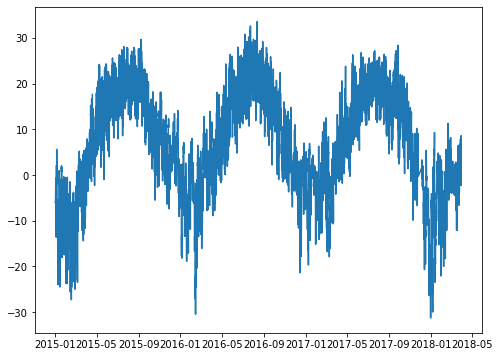

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df['Temp (°C)'])

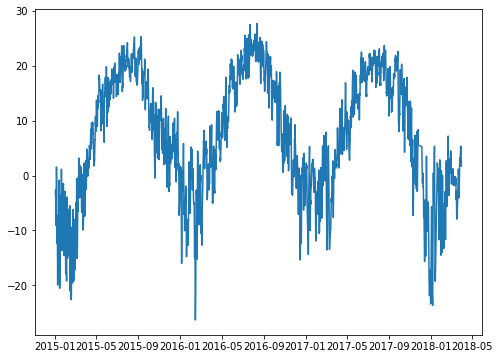

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(test)

### Categorizing the time column

In [ ]:
pd.get_dummies(df['Time'])

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
Date/Time,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 04:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-31 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2018-03-31 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2018-03-31 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### The Year and Time Columns are dropped

In [ ]:
df_train = df.drop(['Year','Time','Temp (°C)'],axis=1) #Dropping time for test case
temp = df['Temp (°C)']
df_train = pd.concat([df_train,temp],axis=1)

## Data Description

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28021 entries, 2015-01-01 00:00:00 to 2018-03-31 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                28021 non-null  int64  
 1   Day                  28021 non-null  int64  
 2   Dew Point Temp (°C)  28020 non-null  float64
 3   Rel Hum (%)          28021 non-null  int64  
 4   Wind Spd (km/h)      28021 non-null  int64  
 5   Stn Press (kPa)      28020 non-null  float64
 6   Temp (°C)            28011 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.7 MB


### Filling missing column values with the mean of 6 hr lag temperature values

In [ ]:
df_train = df_train.fillna(df_train.rolling(6,min_periods=1).mean())

### Cross-Checking If Missing Values are still Present

In [ ]:
df_train.isna().any()

Month                  False
Day                    False
Dew Point Temp (°C)    False
Rel Hum (%)            False
Wind Spd (km/h)        False
Stn Press (kPa)        False
Temp (°C)              False
dtype: bool

### Splitting Data into Train Data and Validation Data

In [ ]:
split_time = sum(df_train.index.year == 2015) + sum(df_train.index.year == 2016) + sum(df_train.index.year == 2017)
time_train = df_train.index[:split_time]
x_train = df_train.iloc[:split_time]
time_valid = df_train.index[split_time:]
x_valid = df_train.iloc[split_time:]

window_size = 14
batch_size = 120
shuffle_buffer = 42

### Helper Function for preparing the dataset into a form acceptable by the model

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:,:-1], window[-1,-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

### Dataset Preparation and Model Build

In [ ]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)
dataset_test = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer)
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x * 0.1,
                      input_shape=[None,6]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True,input_shape=[None])),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu', return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu')),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10)
])

# 4e-4
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-10 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00034)

# [tf.keras.metrics.RootMeanSquaredError()]
# tf.keras.losses.Huber()

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(dataset,validation_data=dataset_test,epochs=50)

Epoch 1/50
216/216 [==============================] - 36s 133ms/step - loss: 7.5125 - root_mean_squared_error: 10.0033 - val_loss: 7.4582 - val_root_mean_squared_error: 10.0400
Epoch 2/50
216/216 [==============================] - 27s 127ms/step - loss: 7.6546 - root_mean_squared_error: 10.0190 - val_loss: 5.9020 - val_root_mean_squared_error: 8.6709
Epoch 3/50
216/216 [==============================] - 27s 127ms/step - loss: 6.4184 - root_mean_squared_error: 8.4175 - val_loss: 3.7039 - val_root_mean_squared_error: 5.1655
Epoch 4/50
216/216 [==============================] - 27s 125ms/step - loss: 4.4462 - root_mean_squared_error: 6.2954 - val_loss: 6.5650 - val_root_mean_squared_error: 8.4461
Epoch 5/50
216/216 [==============================] - 27s 126ms/step - loss: 4.2483 - root_mean_squared_error: 5.9643 - val_loss: 4.9931 - val_root_mean_squared_error: 6.8296
Epoch 6/50
216/216 [==============================] - 27s 127ms/step - loss: 3.7168 - root_mean_squared_error: 5.3421 - va

### Model Evaluation for Multi-Variate Approach

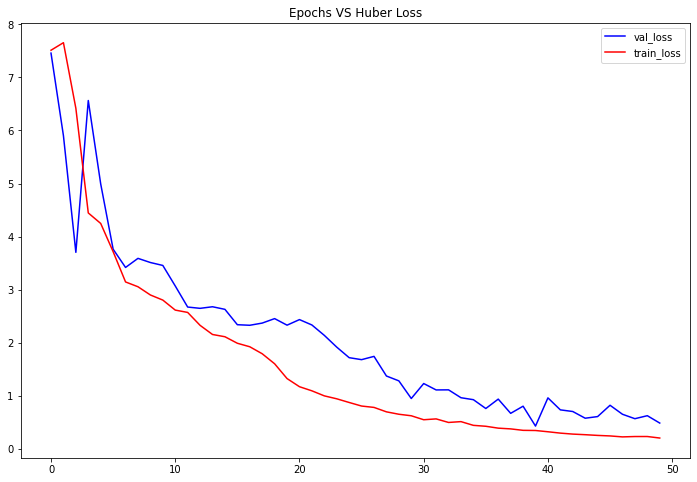

In [ ]:
epochs =  range(50)
plt.figure(figsize=(12,8))
plt.title('Epochs VS Huber Loss')
plt.plot(epochs, history.history["val_loss"],color='b',label='val_loss')
plt.plot(epochs, history.history["loss"],color='r',label='train_loss')
plt.legend()

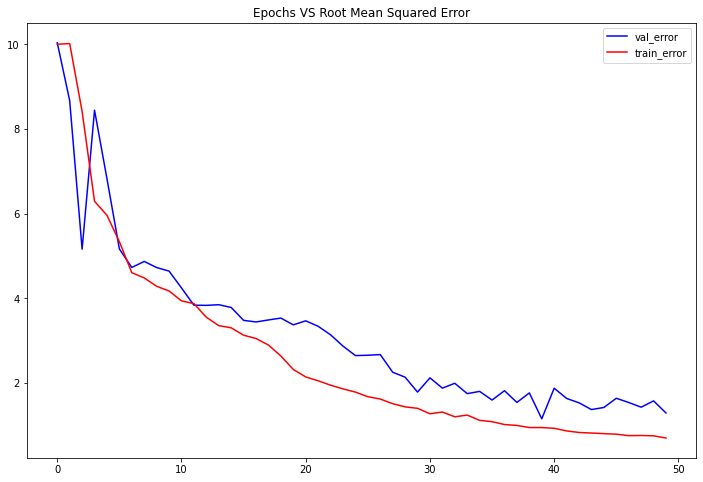

In [ ]:
epochs =  range(50)
plt.figure(figsize=(12,8))
plt.title('Epochs VS Root Mean Squared Error')
plt.plot(epochs, history.history["val_root_mean_squared_error"],color='b',label='val_error')
plt.plot(epochs, history.history["root_mean_squared_error"],color='r',label='train_error')
plt.legend()

### Saving the model and weights

In [ ]:
# model.save_weights('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/conv_net_lstm_weights_epochs_50')

In [ ]:
# model.save('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/conv_net_lstm_model_epochs_50')

### Load Saved Model

In [ ]:
new_model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x * 0.1,
                      input_shape=[None,6]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True,input_shape=[None])),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu', return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu')),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00034)

new_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 6)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          992       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
new_model.load_weights("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.h5")

In [ ]:
# serialize model to JSON
model_json = new_model.to_json()
with open("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model.save_weights("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
from tensorflow.keras.models import model_from_json
json_file = open('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 6)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          992       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

Train Model for one Time Lag

In [ ]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, 0, batch_size, shuffle_buffer)
dataset_test = windowed_dataset(x_valid, 0, batch_size, shuffle_buffer)
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x * 0.1,
                      input_shape=[None,6]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu',return_sequences=True,input_shape=[None])),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu', return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu')),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10)
])

# 4e-4
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-10 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00034)

# [tf.keras.metrics.RootMeanSquaredError()]
# tf.keras.losses.Huber()

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(dataset,validation_data=dataset_test,epochs=23)

Epoch 1/23
216/216 [==============================] - 13s 29ms/step - loss: 10.6801 - root_mean_squared_error: 13.3167 - val_loss: 8.0691 - val_root_mean_squared_error: 10.6424
Epoch 2/23
216/216 [==============================] - 5s 24ms/step - loss: 8.7524 - root_mean_squared_error: 11.1192 - val_loss: 6.6815 - val_root_mean_squared_error: 9.3437
Epoch 3/23
216/216 [==============================] - 5s 25ms/step - loss: 5.7842 - root_mean_squared_error: 7.9309 - val_loss: 5.3122 - val_root_mean_squared_error: 7.4937
Epoch 4/23
216/216 [==============================] - 5s 24ms/step - loss: 4.0797 - root_mean_squared_error: 5.7399 - val_loss: 2.5825 - val_root_mean_squared_error: 3.6137
Epoch 5/23
216/216 [==============================] - 6s 25ms/step - loss: 3.4145 - root_mean_squared_error: 4.9209 - val_loss: 2.5026 - val_root_mean_squared_error: 3.3825
Epoch 6/23
216/216 [==============================] - 5s 25ms/step - loss: 2.7891 - root_mean_squared_error: 4.1632 - val_loss: 1.

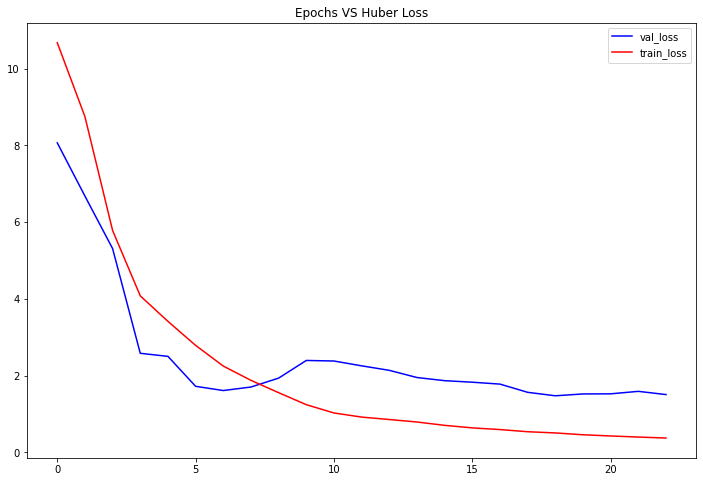

In [ ]:
epochs =  range(23)
plt.figure(figsize=(12,8))
plt.title('Epochs VS Huber Loss')
plt.plot(epochs, history.history["val_loss"],color='b',label='val_loss')
plt.plot(epochs, history.history["loss"],color='r',label='train_loss')
plt.legend()

In [ ]:
# model.save('/gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/hourly_lstm_weights_epochs_23')

INFO:tensorflow:Assets written to: /gdrive/MyDrive/Colab Notebooks/Tensorflow_in_practice/Mr_Kebou_Project/models/hourly_lstm_weights_epochs_23/assets


## Model Forecast And Prediction Section

In [ ]:
series = x_valid.values[:,:-1]
y_valid = x_valid.values[:,-1]

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
model_forecast(model, series[0][np.newaxis,...], 0)[0][0]

-19.221573

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], 0)
rnn_forecast = rnn_forecast[:,0]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


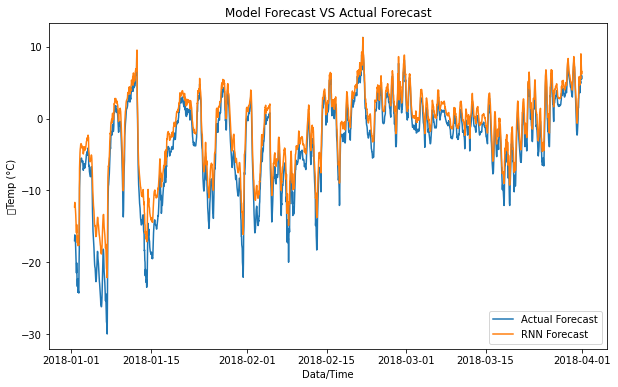

In [ ]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.set_title('Model Forecast VS Actual Forecast')
ax.plot(time_valid[window_size:], y_valid[window_size:],label='Actual Forecast')
ax.plot(time_valid[window_size:], results[window_size:],label='RNN Forecast')
ax.set_xlabel('Data/Time')
ax.set_ylabel('	Temp (°C)')
ax.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


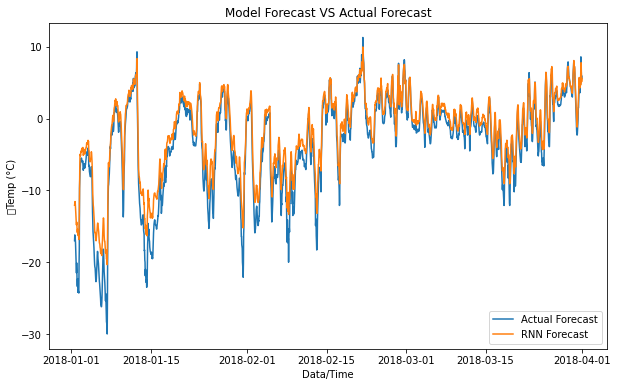

In [ ]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.set_title('Model Forecast VS Actual Forecast')
ax.plot(time_valid[window_size:], y_valid[window_size:],label='Actual Forecast')
ax.plot(time_valid[window_size:], rnn_forecast,label='RNN Forecast')
ax.set_xlabel('Data/Time')
ax.set_ylabel('	Temp (°C)')
ax.legend()

## Looking at the prediction plot of the data above the RNN(LSTM) model performs well in forecasting future unseen temperature values, The actual future temperature value plot is in Blue while the RNN(LSTM) model Forecast Predictions is in orange

In [ ]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# # plt.ylim(0,4)
# # plt.axis([1e-10, 1e-4, 0, 30])

## Trying Out the Univariate approach to see if better forecast can be generated

### Using the temperature data only for model training

In [ ]:
split_time = sum(test.index.year == 2015) + sum(test.index.year == 2016) + sum(test.index.year == 2017)
time_train = test.index[:split_time]
x_train = test.iloc[:split_time]
time_valid = test.index[split_time:]
x_valid = test.iloc[split_time:]

window_size =14
batch_size = 32
shuffle_buffer = 11

#### Helper Function for preparing the data to a form acceptable by the model together with model building and training

In [ ]:
def window_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

dataset = window_dataset(x_train, window_size, batch_size, shuffle_buffer)
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                    input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu', return_sequences=True)),
  tf.keras.layers.Dropout(0.35),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu',return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,activation='relu')),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8,activation='relu'),
  tf.keras.layers.Dense(1)
  # tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
# Train model
history = model.fit(dataset, epochs=100) #callbacks=[lr_schedule])

Epoch 1/100
801/801 [==============================] - 36s 36ms/step - loss: 2.5712 - root_mean_squared_error: 4.7406
Epoch 2/100
801/801 [==============================] - 28s 35ms/step - loss: 0.9572 - root_mean_squared_error: 2.5542
Epoch 3/100
801/801 [==============================] - 29s 36ms/step - loss: 0.7222 - root_mean_squared_error: 2.1342
Epoch 4/100
801/801 [==============================] - 29s 36ms/step - loss: 0.4761 - root_mean_squared_error: 1.3738
Epoch 5/100
801/801 [==============================] - 29s 36ms/step - loss: 0.4145 - root_mean_squared_error: 1.3091
Epoch 6/100
801/801 [==============================] - 29s 36ms/step - loss: 0.3552 - root_mean_squared_error: 1.2262
Epoch 7/100
801/801 [==============================] - 29s 36ms/step - loss: 0.3259 - root_mean_squared_error: 1.1427
Epoch 8/100
801/801 [==============================] - 29s 36ms/step - loss: 0.3106 - root_mean_squared_error: 1.1362
Epoch 9/100
801/801 [==============================] - 2

### Model Evaluation

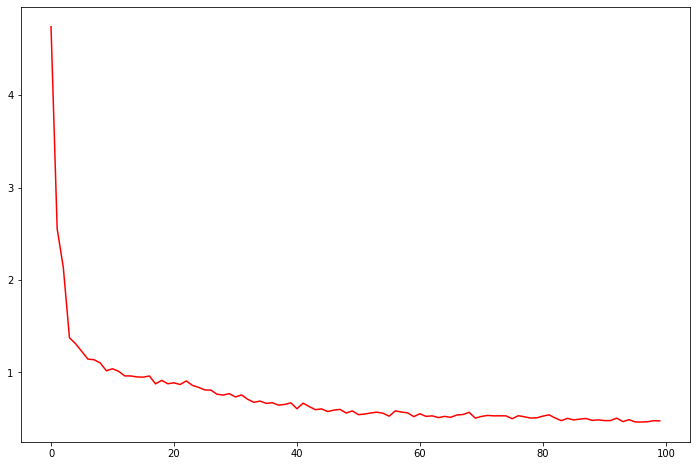

In [ ]:
epochs =  range(100)
plt.figure(figsize=(12,8))
plt.plot(epochs, history.history["root_mean_squared_error"],color='r')

### Forecast and Prediction

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
rnn_forecast = model_forecast(model, x_valid.values[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[:,0]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


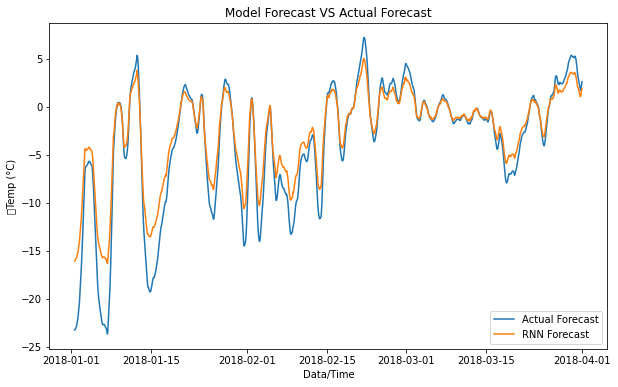

In [ ]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.set_title('Model Forecast VS Actual Forecast')
ax.plot(time_valid[window_size:], x_valid.values[window_size:],label='Actual Forecast')
ax.plot(time_valid[window_size:], rnn_forecast,label='RNN Forecast')
ax.set_xlabel('Data/Time')
ax.set_ylabel('	Temp (°C)')
ax.legend()

#### Looking at the plot, it is clear that the Temperature alone is sufficient to forecast future temperature as the data is auto-correlated and the model can generate patterns from it,however the Predictions are not as optimal as that of the multi-variate approach